In [1]:
# some useful mysklearn package import statements and reloads
import importlib

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import myutils
import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyDummyClassifier, MyNaiveBayesClassifier
from myclassifiers import MyDecisionTreeClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

import matplotlib.pyplot as plt

# Car Sales Classifier 

 We are going to perform some eda and use multiple classifiers to detemermine the most likely sale price of a car based on a number of classifiers. Our train set has the following attributes:  

| Attribute     | Type      | Notes                                         |
| :---          |    :----: |:---                                           |
| pricesold     | int       |Our Class label; will require discretization   |
| make          | string    |                                               |
| year          | int       |                                               |
| title status  | string    |                                               |
| mileage       | int       |                                               |
| color         | string    |                                               |
| VIN           | int       |                                               |
| Lot           | int       |                                               |



First we will import out dataset into a table 

In [2]:
auto_dataset = MyPyTable().load_from_file("used_car_sales.csv")

12335.928231417063
20.0
241110.0
[2136, 2772, 1930, 2216, 1811, 1861, 679, 189, 33, 26, 2]
[ 0  1  2  3  4  5  6  7  8  9 10]


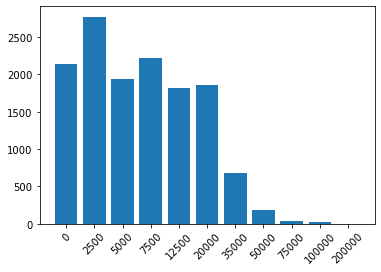

In [19]:
importlib.reload(mysklearn.myutils)
importlib.reload(myutils)

auto_dataset = myutils.clean_data(auto_dataset)
auto_dataset_explored = MyPyTable(column_names=["pricesold","yearsold","Make","Model","Year","BodyType","NumCylinders","DriveType"])
auto_dataset_explored = mysklearn.myutils.create_MyPyTable_for_auto_set(auto_dataset)
auto_dataset_explored.remove_rows_with_missing_values()
prices = auto_dataset_explored.get_column("pricesold")
discritized_prices, ranges = myutils.discretize_sales_price(prices)
myutils.plot_prices(discritized_prices, ranges)
price_sold = auto_dataset.get_column("pricesold")
year_sold = auto_dataset.get_column("yearsold")
make = auto_dataset.get_column("Make")
year = auto_dataset.get_column("Year")
body_type = auto_dataset.get_column("BodyType")
num_cylinders = auto_dataset.get_column("NumCylinders")
drive_type = auto_dataset.get_column("DriveType")


In [34]:
X_train = mysklearn.myutils.create_X_train_for_auto_set_without_prices(auto_dataset_explored)
folds = myevaluation.stratified_kfold_split(X_train, discritized_prices)
actual_train_folds = []
actual_test_folds = []
for fold in folds:
    temp_x_train = []
    temp_x_test = []
    temp_y_train = []
    temp_y_test = []
    place = 0
    for item in fold:   
        for i in item:
            if place == 0:
                temp_x_train.append([year_sold[i], make[i], year[i], body_type[i], num_cylinders[i], drive_type[i]])
                temp_y_train.append(discritized_prices[i])
                
            else:
                temp_x_test.append([year_sold[i], make[i], year[i], body_type[i], num_cylinders[i], drive_type[i]])
                temp_y_test.append(discritized_prices[i])
        place += 1
    actual_train_folds.append((temp_x_train, temp_y_train))
    actual_test_folds.append((temp_x_test, temp_y_test))
count = 1

### Fixing noise

In [50]:
X_train = actual_test_folds[0][0]
y_train = actual_train_folds[0][1]
X_test = actual_test_folds[0][0]
y_test = actual_test_folds[0][1]

pickup = ['Pickup',"Standard Cab Pickup", 'Crew Cab Pickup','Extended Cab Pickup','Pickup (Truck)','Regular Cab Pickup','Pickup Truck','Truck',
        'Cab & Chassis','truck','Pick Up','Quad Cab Extended Pickup', 'Crew Cab Chassis-Cab', 'Short Bed','Double Cab/Long Bed',
        'Standard cab Short bed','Extended Crew Cab Pickup','DUMP','Access Cab','PICKUP','Short bed pickup','Pick up',
        "I think it's a Styleside, Long Bed",'REGULAR CAB','4DR 4x4 Pickup Truck','step side short bed','pick up']
for val in X_train:
    if val[3] in pickup:
        val[3] = "pickup"

sedan = ['Sedan','4dr Car','4 Door','Four-Door Hardtop','4 DOOR SEDAN','Sport Sedan','Touring','4 Door White','SEDAN']
for val in X_train:
    if val[3] in sedan:
        val[3] = "sedan"

coupe = ['Coupe','Fastback','hardtop','2dr Car','2 Door Coupe','2 Dr','Hardtop 2 Door','Targa','Fastback Coupe','2-Seat Roadster','2d : 2 Door Hard TOP',
    'Hardtop','Victoria Coupe','Tudor','2DR Ht','Hardtop Fastback','T-Top','2 Door Sport Coupe','Roadster', 'Coupe with Removable Top','2 door',
    '2 door coupe deluxe','roadster', '2 door post','2-DOOR HARD TOP COUPE','2 Door','2 door Hardtop','Beetle','2 Door Hardtop''Hard top','MR2 Spyder conv.',]
for val in X_train:
    if val[3] in coupe:
        val[3] = "coupe"

SUV = ['SUV','Sport Utility','Minivan', 'Mini-van, Passenger','4D Sport Utility',
    'CHASSIS', 'JEEP','Conv', 'Suv','Sport Utility AWD Navi','Utility Body','suburban','its a CJ !!']
for val in X_train:
    if val[3] in SUV:
        val[3] = "suv"

Van = ['Standard Passenger Van','CONVERSION VAN', 'Van','Extended Passenger Van', 'Van Camper',
    'HighTop Conversion Van', 'High roof 144 walk through van', 'Minivan/Van', 'Full-size Cargo Van','CARGO', 'mid-bus',
     'cargo van', 'Microbus','Bus', 'VAN','Cargo Van']
for val in X_train:
    if val[3] in Van:
        val[3] = "van"

other = ['Convertible', '', 'Limousine', 'Hatchback', 'Wagon', 'Hardtop Convertible', 'Converible', 'LL', '--',
    '4 door limo', 'WAGON', 'Hard top', '2 Door Convertible', '2 door covertable', 'Hearse', 'Convertible Coupe',
    'Station Wagon', 1966.0, 'Superior Hearse', 'Other', 'Silver Spirit', 'Rally', 'SWB']
for val in X_train:
    if val[3] in other:
        val[3] = "other"

all_values = []
for val in X_train:
    if val[3] not in all_values:
        all_values.append(val[3])
print(all_values)





['suv', 'pickup', 'coupe', 'sedan', 'Convertible', '', 'Limousine', 'Hatchback', 'van', 'Wagon', 'Hardtop Convertible', 'Converible', 'LL', '--', '4 door limo', 'WAGON', 'Hard top', '2 Door Convertible', '2 door covertable', 'Hearse', 'Convertible Coupe', 'Station Wagon', 1966.0, 'Superior Hearse', 'Other', 'Silver Spirit', 'Rally', 'SWB']


### Dummy Classifier

In [35]:
dummy = MyDummyClassifier()
dummy.fit(X_train, y_train)
y_predicted = dummy.predict(actual_test_folds[0][0])
print("Accuracy: ", myevaluation.accuracy_score(actual_test_folds[0][1], y_predicted))
print("Error Rate: ", 1.0 - myevaluation.accuracy_score(actual_test_folds[0][1], y_predicted))

Accuracy:  0.444
Error Rate:  0.556


### Bayes Classifier

In [37]:
bayes = MyNaiveBayesClassifier()
bayes.fit(X_train, y_train)
y_predicted = bayes.predict(actual_test_folds[actual_train_folds.index(fold)][0])
print("Accuracy: ", myevaluation.accuracy_score(actual_test_folds[0][1], y_predicted))
print("Error Rate: ", 1.0 - myevaluation.accuracy_score(actual_test_folds[0][1], y_predicted))

KeyError: 'Left hand drive'